<a href="https://colab.research.google.com/github/Seouyang/Today-I-Learned/blob/master/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN
1. Recurrent Neural Network (RNN) using pytorch package

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# RNN with 1 layer
x = torch.randn(1, 5, 3) #batch_size, seq_len, feature
h0 = torch.randn(1, 1, 4) #num_layers*num_directions, batch_size, hidden_size
rnn1 = nn.RNN(input_size=3, hidden_size=4, num_layers=1, bidirectional=False, batch_first=True)
output, hidden = rnn1(x, h0)
print('RNN with 1 layer')
print('output shape: ', output.shape) #batch_size, seq_len, hidden_size
print('output: ', output.data)
print('hidden shape: ', hidden.shape)
print('hidden: ', hidden.data)

RNN with 1 layer
output shape:  torch.Size([1, 5, 4])
output:  tensor([[[ 0.7611, -0.3286,  0.7296,  0.8724],
         [ 0.8989, -0.2217,  0.6334, -0.2594],
         [-0.5380,  0.9458, -0.6621, -0.8479],
         [ 0.6758,  0.4220, -0.7201,  0.9611],
         [ 0.9476,  0.5819,  0.3096, -0.0497]]])
hidden shape:  torch.Size([1, 1, 4])
hidden:  tensor([[[ 0.9476,  0.5819,  0.3096, -0.0497]]])


In [3]:
# RNN with 2 layers
x = torch.randn(1, 5, 3)
h0 = torch.randn(2, 1, 4)
rnn2 = nn.RNN(input_size=3, hidden_size=4, num_layers=2, bidirectional=False, batch_first=True)
output, hidden = rnn2(x, h0)
print('RNN with 2 layer')
print('output shape: ', output.shape)
print('output: ', output.data)
print('hidden shape: ', hidden.shape)
print('hidden: ', hidden.data)

RNN with 2 layer
output shape:  torch.Size([1, 5, 4])
output:  tensor([[[-0.2260,  0.4942,  0.7930,  0.3132],
         [-0.6585,  0.0992,  0.8641,  0.3995],
         [-0.5349,  0.0194,  0.8859,  0.5068],
         [-0.5261, -0.0136,  0.8916,  0.4731],
         [-0.4456,  0.1420,  0.8012,  0.4621]]])
hidden shape:  torch.Size([2, 1, 4])
hidden:  tensor([[[-0.7743,  0.4037, -0.7919,  0.5050]],

        [[-0.4456,  0.1420,  0.8012,  0.4621]]])


In [4]:
# Bidirectional RNN
x = torch.randn(1, 5, 3)
h0 = torch.randn(2, 1, 4)
rnn3 = nn.RNN(input_size=3, hidden_size=4, num_layers=1, bidirectional=True, batch_first=True)
output, hidden = rnn3(x, h0)
print('Bidirectional RNN')
print('output shape: ', output.shape)
print('output: ', output.data)
print('hidden shape: ', hidden.shape)
print('hidden: ', hidden.data)

Bidirectional RNN
output shape:  torch.Size([1, 5, 8])
output:  tensor([[[ 0.4015, -0.0231, -0.2476, -0.4442,  0.0737,  0.2167,  0.8811,
           0.5978],
         [-0.6881, -0.9297,  0.1605, -0.1329, -0.5132,  0.1327, -0.7362,
           0.0412],
         [-0.5627, -0.5197,  0.2902, -0.2010, -0.4680,  0.5193,  0.7604,
           0.0121],
         [ 0.1956, -0.4405, -0.4897, -0.5354, -0.8051, -0.4450, -0.6385,
           0.3105],
         [-0.7238, -0.9245,  0.3837, -0.0608, -0.4317,  0.5372,  0.6647,
           0.0013]]])
hidden shape:  torch.Size([2, 1, 4])
hidden:  tensor([[[-0.7238, -0.9245,  0.3837, -0.0608]],

        [[ 0.0737,  0.2167,  0.8811,  0.5978]]])


In [6]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers, bidirectional):
    super().__init__()
    self.input_size, self.hidden_size, self.output_size = input_size, hidden_size, output_size
    self.num_layers = num_layers
    self.num_directions = 2 if bidirectional else 1

    self.rnn = nn.RNN(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, bidirectional=bidirectional, batch_first=True)
    self.output_fc = nn.Linear(self.hidden_size * self.num_directions, output_size)
  
  def forward(self, x):
    self.batch_size = x.size(0)
    h0 = self.init_hidden()
    output, hidden = self.rnn(x, h0)
    output = self.output_fc(output[:, -1, :])
    return output

  def init_hidden(self):
    return torch.zeros(self.num_layers*self.num_directions, self.batch_size, self.hidden_size)

In [8]:
input_size = 3; hidden_size = 4; output_size = 2
num_layers = 1
bidirectional = True

x = torch.randn(1, 4, input_size)
rnn = RNN(input_size, hidden_size, output_size, num_layers, bidirectional)
output = rnn(x)

print('output shape: ', output.shape)
print('output: ', output.data)

output shape:  torch.Size([1, 2])
output:  tensor([[ 0.1082, -0.0340]])


2. Build a RNN model

In [5]:
import torch 
import torch.nn as nn
import torch.optim as optim
import numpy as np
import os 
import torch.nn.functional as F

from tqdm import tqdm
import string
import random
import re
import time, math

from __future__ import unicode_literals, print_function, division
from io import open
import glob
import unicodedata

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

**Embedding**

To put text data as input of the RNN, we should vectorize the text data using embedding process. Here, we will proceed a simple character-level embedding.

In [9]:
#preprocessing string data
#alphabet(0-25), others(26-32), start(33) -> 34 chars

chars = "abcdefghijklmnopqrstuvwxyz ?!.,:;0"
char_list = [i for i in chars]
char_len = len(char_list)
n_letters = len(char_list)

#String to one-hot vector
#a -> [1 0 0 ... 0 0]

def string_to_onehot(string, seq_len=1):
  start = np.zeros(shape=len(char_list), dtype=int)
  end = np.zeros(shape=len(char_list), dtype=int)
  start[-1] = 1 #initial input

  for i in range(seq_len):
    if i == 0:
      onehot = start
    else:
      onehot = np.vstack([start, onehot])
  
  for i in string:
    idx = char_list.index(i)
    zero = np.zeros(shape=char_len, dtype=int)
    zero[idx] = 1
    onehot = np.vstack([onehot, zero])
  return onehot

#Onehot vector to string
#[1 0 0 ... 0 0] -> a

def onehot_to_word(onehot_1):
  out = ''
  for i in range(onehot_1.size(0)):
    onehot = torch.Tensor.numpy(onehot_1[i, :])
    out = out + char_list[onehot.argmax()]
  return out

In [14]:
print("The total number of character:", char_len)

The total number of character:  34


In [16]:
string = 'ak'
a_onehot = string_to_onehot(string, 1)
print("The one-hot vector of a:", a_onehot)
print("The shape of one-hot:", np.shape(a_onehot))
a_vec = a_onehot[1:np.shape(a_onehot)[0], :]
a_string = onehot_to_word(torch.Tensor(a_vec))
print("The original string:", a_string)

The one-hot vector of a: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
The shape of one-hot: (3, 34)
The original string: ak


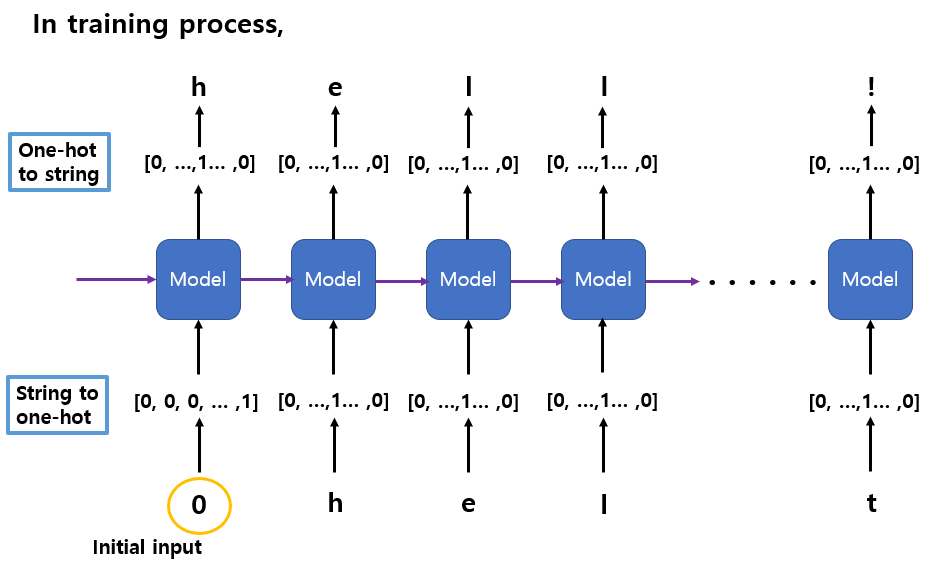
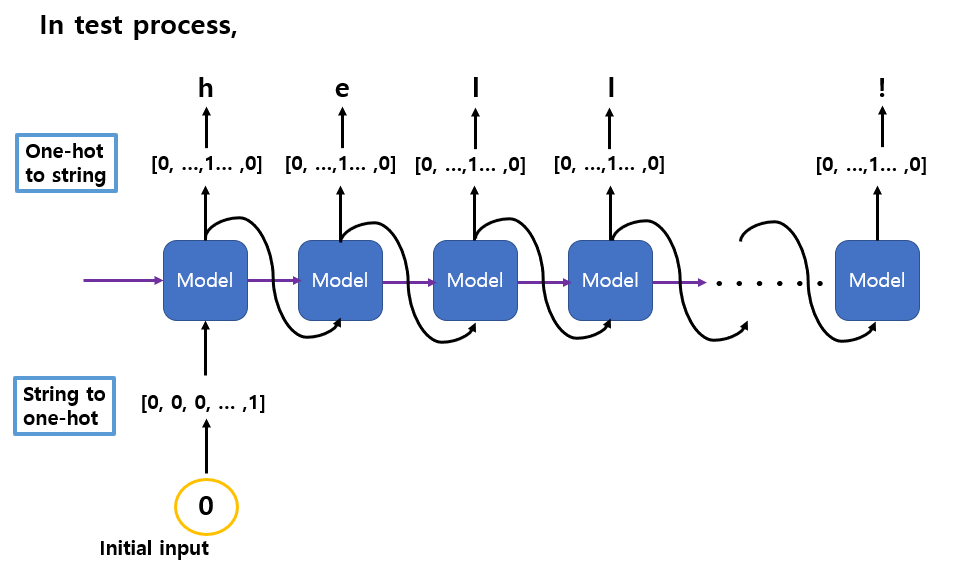

In [18]:
string = 'hello pytorch.how long can a rnn cell remember? show us your limit!'
input_size = char_len
hidden_size = 50
output_size = input_size
lr = 0.01
epochs = 2000

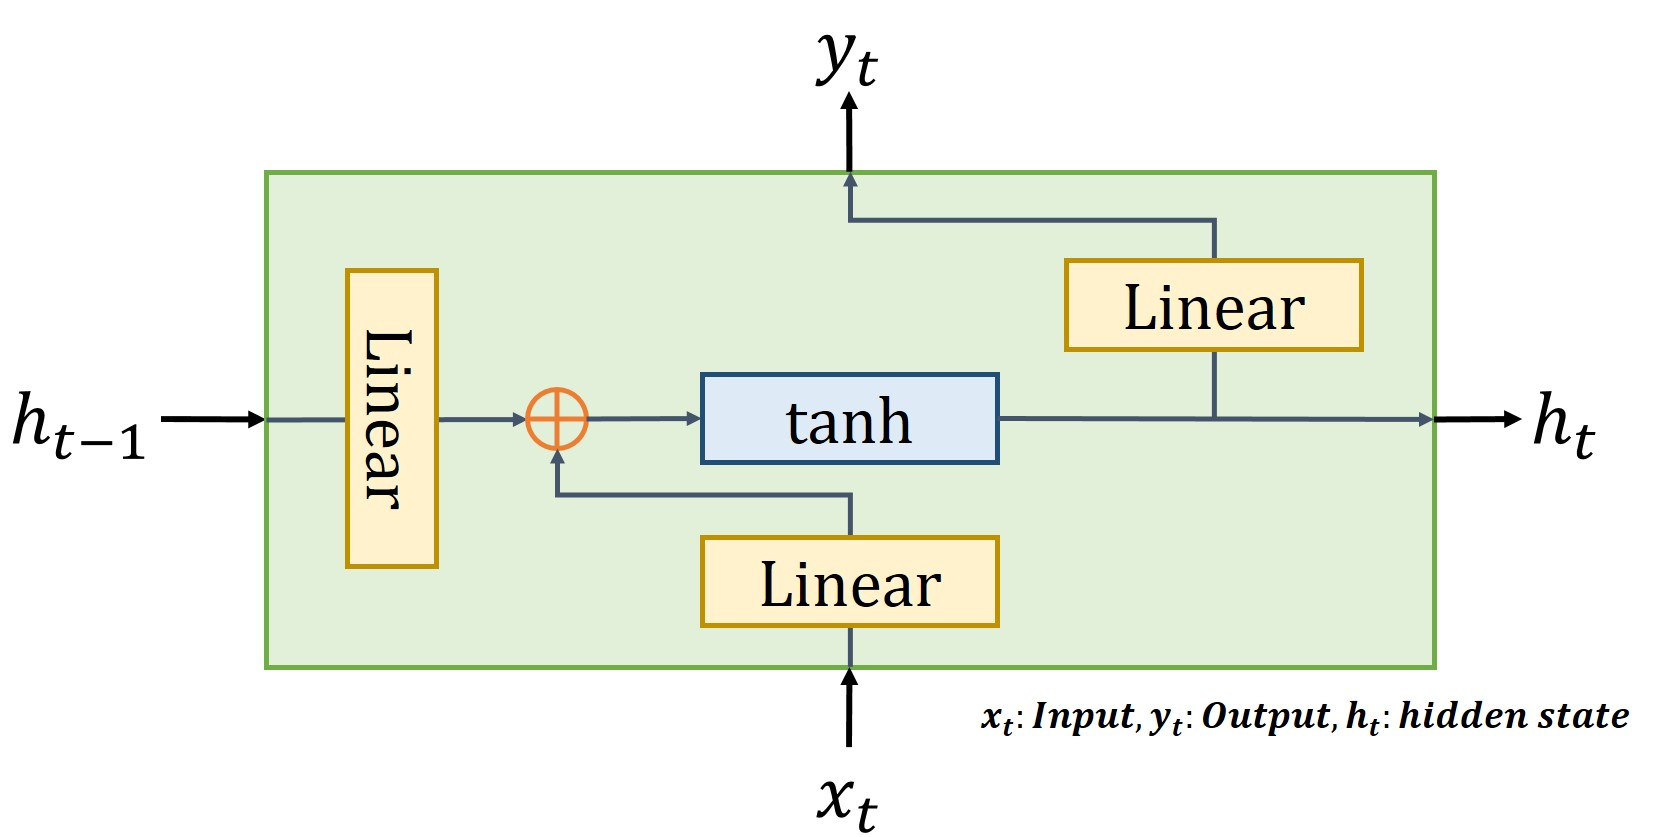

In [19]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    self.i2h = nn.Linear(input_size, hidden_size)
    self.h2h = nn.Linear(hidden_size, hidden_size)
    self.h2o = nn.Linear(hidden_size, output_size)
    self.act_fn = nn.Tanh()
  
  def forward(self, input, hidden):
    hidden = self.act_fn(self.i2h(input) + self.h2h(hidden))
    output = self.h2o(hidden)
    return output, hidden
  
  def init_hidden(self):
    return torch.zeros(1, self.hidden_size)

In [20]:
rnn = RNN(input_size, hidden_size, output_size)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=lr)

In [21]:
one_hot = torch.from_numpy(string_to_onehot(string)).type_as(torch.FloatTensor())
print(onehot_to_word(one_hot))

0hello pytorch.how long can a rnn cell remember? show us your limit!


In [22]:
for i in range(epochs):
  rnn.zero_grad()
  total_loss = 0
  hidden = rnn.init_hidden()

  for j in range(len(string)):
    input = one_hot[j]
    output, hidden = rnn.forward(input, hidden)
    target = one_hot[j+1]

    loss = loss_func(output.view(-1), target.view(-1))
    total_loss += loss
    
  total_loss.backward()
  optimizer.step()

  if i % 100 == 0:
    print('At {:4d}th epoch, Loss: {:0.4f}'.format(i, total_loss.item()))

At    0th epoch, Loss: 3.4342
At  100th epoch, Loss: 0.1130
At  200th epoch, Loss: 0.0349
At  300th epoch, Loss: 0.0198
At  400th epoch, Loss: 0.0173
At  500th epoch, Loss: 0.0093
At  600th epoch, Loss: 0.0235
At  700th epoch, Loss: 0.0067
At  800th epoch, Loss: 0.0200
At  900th epoch, Loss: 0.0047
At 1000th epoch, Loss: 0.0026
At 1100th epoch, Loss: 0.0019
At 1200th epoch, Loss: 0.0074
At 1300th epoch, Loss: 0.0028
At 1400th epoch, Loss: 0.0015
At 1500th epoch, Loss: 0.0009
At 1600th epoch, Loss: 0.0007
At 1700th epoch, Loss: 0.0006
At 1800th epoch, Loss: 0.0006
At 1900th epoch, Loss: 0.0004


In [23]:
hidden = rnn.init_hidden()
input = one_hot[0:1, :]
for i in range(len(string)):
  output, hidden = rnn.forward(input, hidden)
  
  output_target = output[-1].view(1, -1)
  print(onehot_to_word(output_target.data), end="")

  input = output_target

hello pytoruioiosoioioio oioios iopohoaosoi iyourrnorusoioi honono 

3. Build a LSTM model
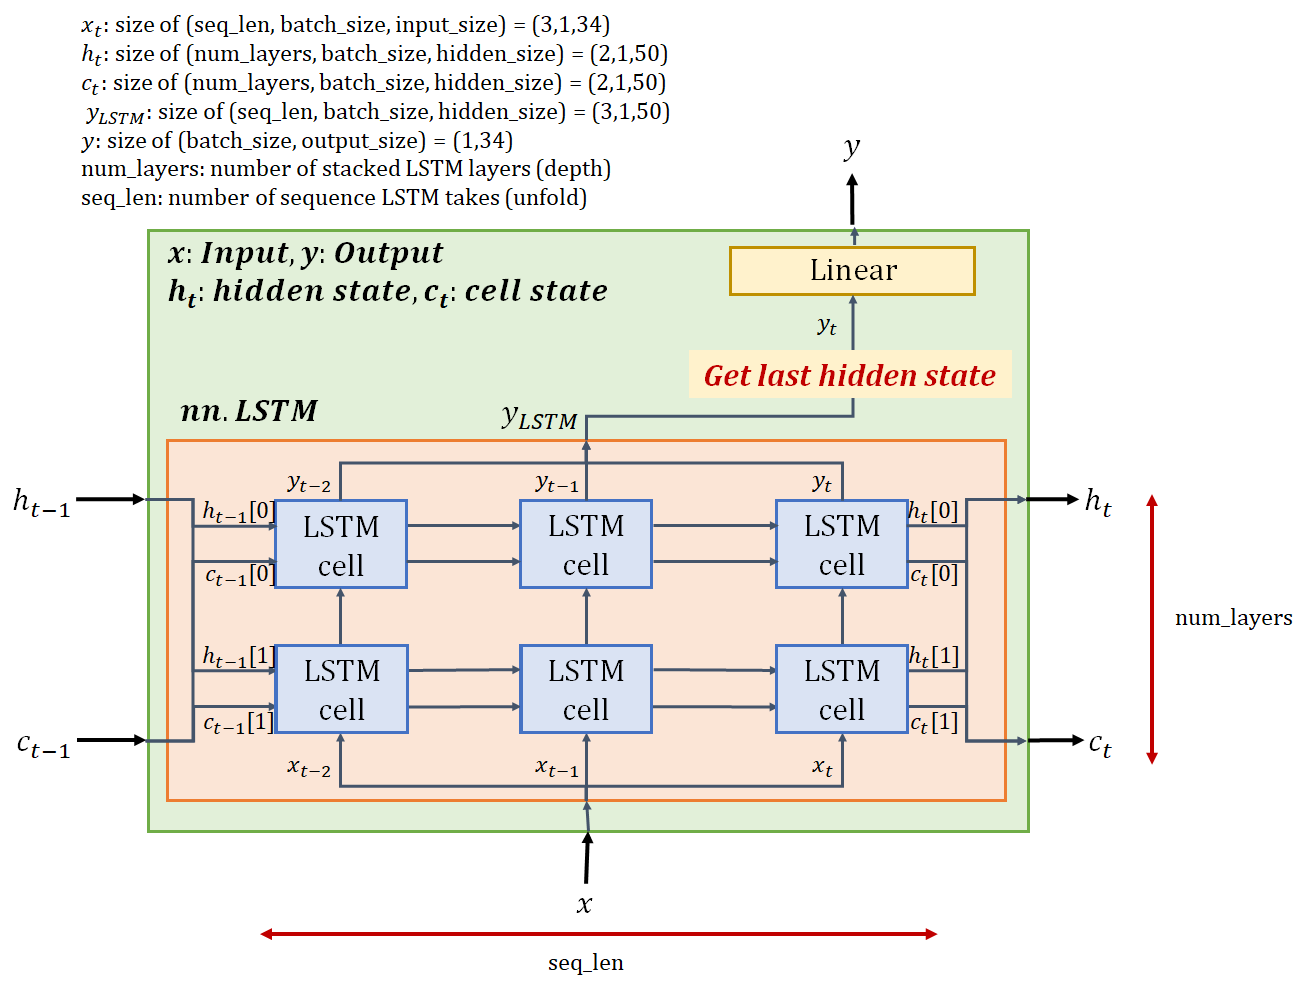

In [6]:
string = "hello pytorch. how long can a rnn cell remember? show me your limit!"
chars = "abcdefghijklmnopqrstuvwxyz ?!.,:;0"
char_list = [i for i in chars]
char_len = len(char_list)
input_size = char_len
hidden_size = 50
output_size = char_len

batch_size = 1
num_layers = 2
seq_len = 3

lr = 0.01
num_epochs = 400

In [7]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers):
    super(LSTM, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
    self.h2o = nn.Linear(hidden_size, output_size)
  
  def forward(self, input, hidden, cell):
    output_LSTM, (hidden, cell) = self.lstm(input, (hidden, cell))
    output = self.h2o(output_LSTM[-1, :, :]).reshape(batch_size, output_size)
    return output, hidden, cell
  
  def init_hidden_cell(self):
    hidden = torch.zeros(num_layers, batch_size, hidden_size)
    cell = torch.zeros(num_layers, batch_size, hidden_size)
    return hidden, cell

In [8]:
lstm = LSTM(input_size, hidden_size, output_size, num_layers)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=lr)

In [10]:
one_hot = torch.from_numpy(string_to_onehot(string, seq_len)).type_as(torch.FloatTensor())
print(onehot_to_word(one_hot))

000hello pytorch. how long can a rnn cell remember? show me your limit!


In [11]:
for i in range(num_epochs):
  lstm.zero_grad()
  total_loss = 0
  hidden, cell = lstm.init_hidden_cell()

  for j in range(len(string)):
    input_data = one_hot[j:j+seq_len].view(seq_len, batch_size, -1)
    output, hidden, cell = lstm(input_data, hidden, cell)
    target = one_hot[j+seq_len].view(1, -1)
    loss = loss_func(output, target)
    total_loss += loss
  
  total_loss.backward()
  optimizer.step()

  if i % 100 == 0:
    print('At {:3d}th epoch, Loss: {:0.4f}'.format(i, total_loss.item()))

At   0th epoch, Loss: 2.4368
At 100th epoch, Loss: 0.0031
At 200th epoch, Loss: 0.0002
At 300th epoch, Loss: 0.0000


In [12]:
hidden, cell = lstm.init_hidden_cell()
input_data = one_hot[0:0+seq_len].view(seq_len, 1, -1)

for j in range(len(string)):
  output, hidden, cell = lstm(input_data, hidden, cell)
  print(onehot_to_word(output.data), end="")
  input_data = torch.cat((input_data[1:,:,:], output.data.view(1, 1, -1)), dim=0)

hello pytorch. how long can a rnn cell remember? show me your limit!

Reference: KAIST EE488 practice materials